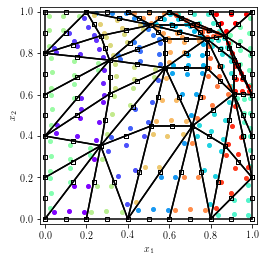

In [1]:
# GHOST - Advection Test (2D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh2D
from Discretization import SpatialDiscretization
from Solver import Solver

# discretization degree
p = 2

# geometry mapping degree
p_geo = 1

# read in mesh in GMSH format
mesh = Mesh2D("test", "../mesh/square_mesh_L1_x_6y_6.msh")

# set up periodic boundary conditions
left = np.array([1.0,0.0,0.0]) 
right = np.array([1.0,0.0,1.0])
bottom = np.array([0.0,1.0,0.0])
top = np.array([0.0,1.0,1.0])
mesh.add_bc_on_hyperplanes([left,right,bottom,top],[1,2,3,4])
mesh.make_periodic((1,2),[1]) # left-right periodic (bcs parallel to axis 1)
mesh.make_periodic((3,4),[0]) # top-bottom periodic (axis 0)

#curvilinear transformation used in Del Rey Fernandez et al. (2017)
mesh.map_mesh(f_map=Mesh2D.grid_transformation(warp_factor=0.2), p_geo=p_geo)

# volume and facet quadrature degrees
tau = 2*p
mu = 2*p-1

theta = np.pi/4
a = np.sqrt(2)

# solver parameters
params = {"project_title": "advection_p2b0c0t3",
         "problem": "constant_advection",
         "initial_condition": "sine",
         "wavelength": np.ones(2),
         "wave_speed": a*np.array([np.sin(theta),np.cos(theta)]),
         "upwind_parameter": 0.0,
         "integration_type": "quadrature",
         "solution_degree": p,
         "volume_quadrature_degree": tau,
         "facet_quadrature_degree": mu,
         "facet_rule": "lgl",
         "solution_representation": "modal",
         "form": "weak",
         "correction": "c_dg",
         "time_integrator": "rk44",
         "final_time": 1.0,
         "time_step_scale": 0.0025}

# set up solver
weak = Solver(params,mesh)
params_strong = params.copy()
params_strong["form"] = "strong"
strong = Solver(params_strong,mesh)
strong.discretization.plot()

In [2]:
strong.run(write_interval=0.1)
strong.post_process(error_quadrature_degree=4*p)

dt =  5e-05
writing every  2000  time steps, total  20000
writing time step  2000 : t =  0.09999999999999715
writing time step  4000 : t =  0.19999999999998613
writing time step  6000 : t =  0.2999999999999751
writing time step  8000 : t =  0.3999999999999641
writing time step  10000 : t =  0.4999999999999531
writing time step  12000 : t =  0.5999999999999421
writing time step  14000 : t =  0.6999999999999311
writing time step  16000 : t =  0.7999999999999201
writing time step  18000 : t =  0.8999999999999091
writing time step  20000 : t =  0.9999999999998981


In [3]:
weak.run(write_interval=0.1)
weak.post_process(error_quadrature_degree=4*p)

dt =  5e-05
writing every  2000  time steps, total  20000
writing time step  2000 : t =  0.09999999999999715
writing time step  4000 : t =  0.19999999999998613
writing time step  6000 : t =  0.2999999999999751
writing time step  8000 : t =  0.3999999999999641
writing time step  10000 : t =  0.4999999999999531
writing time step  12000 : t =  0.5999999999999421
writing time step  14000 : t =  0.6999999999999311
writing time step  16000 : t =  0.7999999999999201
writing time step  18000 : t =  0.8999999999999091
writing time step  20000 : t =  0.9999999999998981


In [4]:
print("{:.3e}".format(strong.calculate_difference(weak)[0]), "&",
        "{:.3e}".format(strong.I_f[0] - strong.I_0[0]), "&",        
        "{:.3e}".format(weak.I_f[0] - weak.I_0[0]), "&",        
        "{:.3e}".format(strong.E_f[0] - strong.E_0[0]), "&",        
        "{:.3e}".format(weak.E_f[0] - weak.E_0[0]), "&",
        "{:.3e}".format(strong.calculate_error()[0]), "&",
        "{:.3e}".format(weak.calculate_error()[0]))

3.350e+92 & 1.269e+76 & -2.135e+26 & 1.122e+185 & 5.933e+85 & 3.350e+92 & 7.703e+42
